<a href="https://colab.research.google.com/github/WildArcher/CupIT2020/blob/master/cup_it_final_Copy2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
data = pd.read_csv('CL_megafon_Cup IT_2020_final_data.csv', sep=';')

In [0]:
data['time_start'] = pd.to_datetime(data['time_start'])
data['time_end'] = pd.to_datetime(data['time_end'])

In [6]:
data['duration'] = data['time_end'] - data['time_start']
data['min']= data['duration'].dt.seconds/60
data

,time_start,time_end,place_latitude,place_longitude,duration,min
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,04:30:51,270.850000
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,03:19:04,199.066667
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,00:37:19,37.316667
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,00:33:56,33.933333
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,04:18:40,258.666667
...,...,...,...,...,...,...
78218,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402,03:14:28,194.466667
78219,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573,06:27:27,387.450000
78220,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573,01:06:16,66.266667
78221,2018-11-06 00:05:57,2018-11-06 08:50:10,28.619318,114.397573,08:44:13,524.216667


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78223 entries, 0 to 78222
Data columns (total 6 columns):
time_start         78223 non-null datetime64[ns]
time_end           78223 non-null datetime64[ns]
place_latitude     78223 non-null float64
place_longitude    78223 non-null float64
duration           78223 non-null timedelta64[ns]
min                78223 non-null float64
dtypes: datetime64[ns](2), float64(3), timedelta64[ns](1)
memory usage: 3.6 MB


In [8]:
index_fast_repare_in_one_minute = []
for i in range(data.shape[0]):
    if data['duration'][i] == 0:
        index_fast_repare_in_one_minute.append(i)
        
print(len(index_fast_repare_in_one_minute), 'обрывов закончились в ту же секунду')

0 обрывов закончились в ту же секунду


In [9]:
from datetime import datetime

index_fast_repare_in_one_minute = []
for i in range(data.shape[0]):
    if data['min'][i] <=2:
        index_fast_repare_in_one_minute.append(i)
        
print(len(index_fast_repare_in_one_minute), 'обрывов закончились меньше чем за 2 минуты')

100 обрывов закончились меньше чем за 2 минуты


In [10]:
index_fast_repare_in_one_minute = []
for i in range(data.shape[0]):
    if data['min'][i] <=60:
        index_fast_repare_in_one_minute.append(i)
        
print(len(index_fast_repare_in_one_minute), 'обрывов закончились меньше чем за час')

19186 обрывов закончились меньше чем за час


In [0]:
data_target = data['min'].copy()

In [0]:
low, up = np.percentile(data['min'].values, [1 , 95]) 

bad_index = list(data[data['min'].values > up].index)

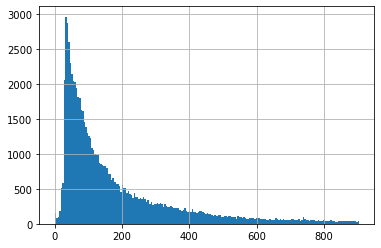

In [13]:
data['min'].drop(index=bad_index).hist(bins=200)

In [0]:
data.drop(index=bad_index, inplace=True)
data.index = range(data.shape[0])

In [0]:
count =0 
for i in range(data.shape[0]):  
  if data.time_start[i].month == 2:
    count+=1

## MeanShift

In [0]:
from sklearn.cluster import MeanShift

In [0]:
new_data = data[['place_latitude', 'place_longitude']].copy()

In [19]:
%%time

clustering = MeanShift(bandwidth = 0.1, n_jobs=-1).fit(new_data)

CPU times: user 18.1 s, sys: 1.89 s, total: 19.9 s
Wall time: 7min 41s


In [20]:
len(np.unique(clustering.predict(new_data)))

518

In [0]:
new_data['class'] = clustering.predict(new_data)

In [0]:
#fig, axes = plt.subplots(figsize=(15, 15))
#plt.scatter(new_data['place_latitude'].values.reshape(-1,1), 
#            new_data['place_longitude'].values.reshape(-1,1), s=10)

In [0]:
#fig, axes = plt.subplots(figsize=(15, 15))
#plt.scatter(new_data['place_latitude'][new_data['class'] == 58].values.reshape(-1,1), 
#            new_data['place_longitude'][new_data['class'] == 58].values.reshape(-1,1), s=10)

In [0]:
data['class'] = new_data['class']

In [26]:
data

,time_start,time_end,place_latitude,place_longitude,duration,min,class
0,2019-08-24 14:23:56,2019-08-24 18:54:47,28.102908,113.617867,04:30:51,270.850000,58
1,2018-06-19 08:56:22,2018-06-19 12:15:26,28.102908,113.617867,03:19:04,199.066667,58
2,2018-08-29 14:00:32,2018-08-29 14:37:51,28.102908,113.617867,00:37:19,37.316667,58
3,2019-12-10 16:01:26,2019-12-10 16:35:22,28.102908,113.617867,00:33:56,33.933333,58
4,2019-12-10 13:39:42,2019-12-10 17:58:22,28.999495,115.167583,04:18:40,258.666667,42
...,...,...,...,...,...,...,...
74306,2018-09-28 10:17:20,2018-09-28 14:33:46,28.945221,114.357402,04:16:26,256.433333,14
74307,2018-06-25 11:25:04,2018-06-25 14:39:32,28.945221,114.357402,03:14:28,194.466667,14
74308,2018-04-06 10:07:13,2018-04-06 16:34:40,28.619318,114.397573,06:27:27,387.450000,2
74309,2018-07-13 22:59:34,2018-07-14 00:05:50,28.619318,114.397573,01:06:16,66.266667,2


In [0]:
data_for_time_series = data[['time_start', 'min']][data['class'] == 58].copy()

In [164]:
data_for_time_series 

,time_start,min
0,2019-08-24 14:23:56,270.850000
1,2018-06-19 08:56:22,199.066667
2,2018-08-29 14:00:32,37.316667
3,2019-12-10 16:01:26,33.933333
1110,2018-08-07 20:36:49,72.900000
...,...,...
72561,2019-12-25 11:38:35,175.283333
72562,2019-12-20 11:04:25,409.916667
72563,2019-12-10 16:26:18,84.616667
72866,2019-01-20 17:59:36,155.833333


## Time series для одного кластера


In [0]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor

In [0]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [165]:
data_for_time_series.index = data_for_time_series['time_start']
data_for_time_series["year"] = data_for_time_series.index.year
data_for_time_series["month"] = data_for_time_series.index.month
data_for_time_series["weekday"] = data_for_time_series.index.weekday
data_for_time_series["hour"] = data_for_time_series.index.hour
data_for_time_series["minute"] = data_for_time_series.index.minute
#data_for_time_series['is_weekend'] = data_for_time_series.weekday.isin([5,6])*1
data_for_time_series.drop(labels=['time_start'], inplace=True, axis=1)
data_for_time_series = data_for_time_series.sort_values(by='time_start')
data_for_time_series

,min,year,month,weekday,hour,minute
time_start,,,,,,
2018-01-01 04:35:56,472.383333,2018,1,0,4,35
2018-01-01 19:30:47,31.516667,2018,1,0,19,30
2018-01-02 16:11:12,14.116667,2018,1,1,16,11
2018-01-23 14:55:41,34.816667,2018,1,1,14,55
2018-01-26 16:01:02,52.516667,2018,1,4,16,1
...,...,...,...,...,...,...
2020-01-20 17:17:27,383.266667,2020,1,0,17,17
2020-01-27 10:16:26,389.983333,2020,1,0,10,16
2020-01-28 21:44:34,29.966667,2020,1,1,21,44


In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.pipeline import Pipeline

In [0]:
def mape(y_true, y_pred):
  return 100*np.sum(np.abs((y_true - y_pred) / y_true))/len(y_true)

In [0]:
def prepareData(data, lag_start, lag_end, test_size):

    data = pd.DataFrame(data.copy())

    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data['min'].shift(i)

    test_index = int(len(data)*(1-test_size))

    #data['year_average'] = list(map(code_mean(data[:test_index], 'year', 'min').get, data.year))
    data['month_average'] = list(map(code_mean(data[:test_index], 'month', 'min').get, data.month))
    data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', 'min').get, data.weekday))
    data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', 'min').get, data.hour))
    data["minute_average"] = list(map(code_mean(data[:test_index], 'minute', 'min').get, data.minute))

    data.drop(['year', 'month', 'weekday', 'hour', 'minute'], axis=1, inplace=True)
    data.dropna(inplace=True)
    data = data.reset_index(drop=True)

    sfs = SFS(estimator=lr, k_features=7, scoring='neg_mean_absolute_error')
    sfs.fit(data.drop(['min'], axis=1), data['min'])

    reg_pipe = Pipeline([('sfs', sfs),
                      ('LinearReg', lr)])

    for i in range(lag_start, lag_end):
        data.drop(labels=["lag_{}".format(i)], inplace=True, axis=1)

    for i in reg_pipe.named_steps['sfs'].k_feature_idx_:
        data["lag_{}".format(i)] = data['min'].shift(i)

    data.dropna(inplace=True)
    data = data.reset_index(drop=True)

    X_train = data.loc[:test_index].drop(['min'], axis=1)
    y_train = data.loc[:test_index]['min']
    X_test = data.loc[test_index:].drop(['min'], axis=1)
    y_test = data.loc[test_index:]['min']

    return X_train, X_test, y_train, y_test

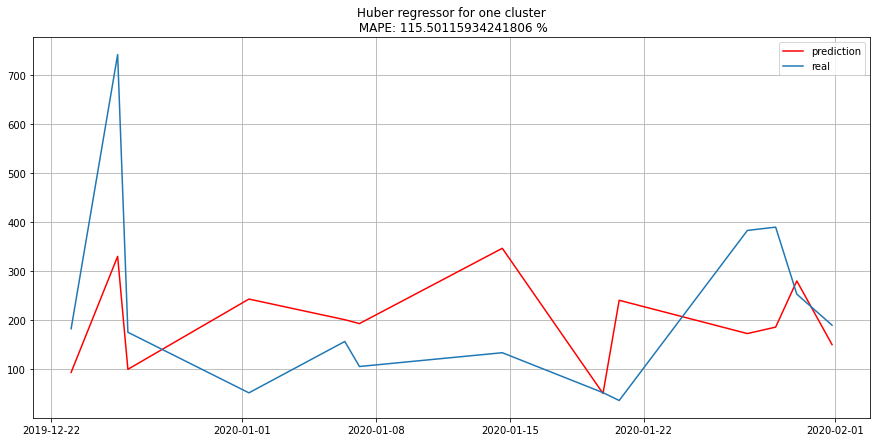

In [256]:
X_train, X_test, y_train, y_test = prepareData(data_for_time_series, test_size=0.2, lag_start=1, lag_end=20)
lr = HuberRegressor()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

for i in range(len(prediction)):
  if prediction[i] < 15:
    prediction[i] = 15

plt.figure(figsize=(15, 7))
plt.plot(data_for_time_series.index[len(data_for_time_series)-len(y_test):], prediction, 'r', label='prediction')
plt.plot(data_for_time_series.index[len(data_for_time_series)-len(y_test):], y_test, label='real')
plt.legend(loc="best")
plt.title("Huber regressor for one cluster\n MAPE: {} %".format(mape(y_test, prediction)))
plt.grid(True)

# Увы, выбросы очень сильно ухудшают метрику, даже если остальные предикты +- норм
# Если поставить метрику neg_mean_squared_error В sfs, то выбросы сглаживаются, а другие предсказания становятся хуже

In [243]:
y_test

235    253.133333
236    189.783333
Name: min, dtype: float64

In [212]:
prediction

array([147.20065242, 228.0770388 , 282.03947066, 110.78938149])

In [185]:
1-mean_absolute_error(y_test, prediction)/y_test.mean()

0.4298881404163355

In [0]:
#data_for_time_series = data[['time_start', 'min']][data['class'] == 0].copy()

In [0]:
#data_for_time_series = data_for_time_series.sort_values(by='time_start')
#data_for_time_series

In [147]:
# Этот кусок в доработке

lr = LinearRegression()
mape = np.zeros(len(np.unique(data['class'])))

for i in range(len(np.unique(data['class']))):
  data_for_time_series = data[['time_start', 'min']][data['class'] == i].copy()

  data_for_time_series.index = data_for_time_series['time_start']
  data_for_time_series["year"] = data_for_time_series.index.year
  data_for_time_series["month"] = data_for_time_series.index.month
  data_for_time_series["weekday"] = data_for_time_series.index.weekday
  data_for_time_series["hour"] = data_for_time_series.index.hour
  data_for_time_series["minute"] = data_for_time_series.index.minute
  #data_for_time_series['is_weekend'] = data_for_time_series.weekday.isin([5,6])*1
  data_for_time_series.drop(labels=['time_start'], inplace=True, axis=1)
  data_for_time_series = data_for_time_series.sort_values(by='time_start')
  
  if (len(data_for_time_series) > 800) and (len(data_for_time_series) < 1500):
    X_train, X_test, y_train, y_test = prepareData(data_for_time_series, test_size=0.1, lag_start=1, lag_end=int(len(data_for_time_series)*0.1 - 10))
  elif len(data_for_time_series)  < 300:
    X_train, X_test, y_train, y_test = prepareData(data_for_time_series, test_size=0.3, lag_start=1, lag_end=int(len(data_for_time_series)*0.1))
  elif len(data_for_time_series)  > 1500:
    X_train, X_test, y_train, y_test = prepareData(data_for_time_series, test_size=0.1, lag_start=1, lag_end=24)
  else:
      X_train, X_test, y_train, y_test = prepareData(data_for_time_series, test_size=0.2, lag_start=1, lag_end=int(len(data_for_time_series)*0.2 - 15))

  lr.fit(X_train, y_train)
  prediction = lr.predict(X_test)

  mape[i] = 1 - mean_absolute_error(prediction, y_test)/y_test.mean()
  print(mape[i], i)

0.9999999999999986 0
0.9999999999999993 1


ValueError: ignored

In [0]:
mape.mean()